# Image Classification 

# MNIST DATASET - Deep Learning

#####                                                                                                                                                                -- Swapnil Srivastava (Batch : 5270)

### Import Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

### Load MNIST dataset from keras and Split into Training and Testing sets

In [128]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Checking the Feature space and size

In [129]:
len(X_train)

60000

In [130]:
len(X_test)

10000

In [131]:
X_train[0].shape

(28, 28)

### Viewing the Training set

##### X_train

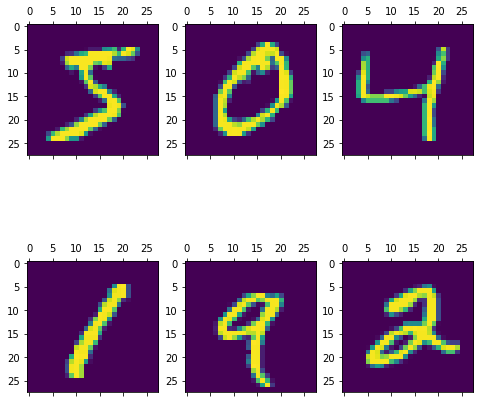

In [132]:
ax = (('ax0','ax1','ax2'), ('ax3','ax4','ax5'))

fig, ax  = plt.subplots(2,3, figsize = (8,8))
j = 0
for i in ax:
    for k in i:
        k.matshow(X_train[j])
        j += 1

##### y_train

In [133]:
for i in range(6):
    print(y_train[i], end ="    ")

5    0    4    1    9    2    

In [134]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Scaling

##### The values in training and test set are spread across (0 , 255). Such widespread values will affect the accuracy of our model and thus we need to scale the values in (0 , 1)

In [135]:
X_train = X_train/255
X_test = X_test/255

In [136]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [137]:
X_train.shape

(60000, 28, 28)

## Flattening the matrix

##### To pass the X feature matrix to the input layer, we need to make sure that the feature space is 1-D as the nodes in input layer.

In [138]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [139]:
X_train_flat.shape

(60000, 784)

# -------------------------------------------------------------------------------------------------------------

## Building our First Model

##### Here weuse Sequential() from keras to build a model with one input layer and an output layer.
##### Dense keyword is used to tell the model that each inout node is connected to every output node.
##### Activation funtion :  We are using 'sigmoid' as the activation function {sigmoid : 1/(1+exp(-x))}.
##### Loss function : For loss function we are using 'sparse_categorical_crossentropy' as the target classes are distinct and whole integers. 
##### One can also use other loss functions.
##### Optimizer : I have used 'adam' optimizer here but one can experiment with others such as AdaDelta, SGD etc.
##### Epochs : epochs is the number of iterations which is 10 here

In [140]:
first_model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
])

first_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

first_model.fit(X_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4890 - accuracy: 0.8779
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2856 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2749 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2626 - accuracy: 0.9278
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2528 - accuracy: 0.9310
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

## Checking the accuracy of our model

In [141]:
first_model.evaluate(X_test_flat,y_test)[1]*100

313/313 [==============================] - 0s 965us/step - loss: 0.2595 - accuracy: 0.9277


92.76999831199646

##### Accuracy : 92.76 %

## Predicting

In [142]:
y_pred_1 = first_model.predict(X_test_flat)
y_pred_1[0]

array([1.4907644e-06, 1.0981003e-12, 8.1320231e-06, 5.8765113e-03,
       3.1784913e-07, 5.7093806e-05, 1.0683614e-11, 7.3980153e-01,
       2.5441685e-05, 3.7339330e-04], dtype=float32)

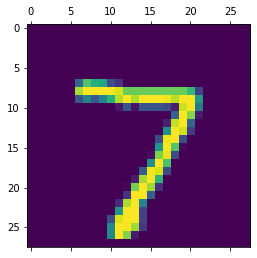

In [143]:
plt.matshow(X_test[0])

In [144]:
np.argmax(y_pred_1[0])

7

##### The prediction is pretty accurate

## Confusion Matrix 1

In [145]:
y_pred_labels1 = [np.argmax(i) for i in y_pred_1]
y_pred_labels1[:3]

[7, 2, 1]

In [164]:
print(y_test[:7])
print(y_pred_labels1[:7])

[7 2 1 0 4 1 4]
[7, 2, 1, 0, 4, 1, 4]


In [146]:
conf_mat_1 = tf.math.confusion_matrix(labels = y_test, predictions=y_pred_labels1)

Text(69.0, 0.5, 'True Value')

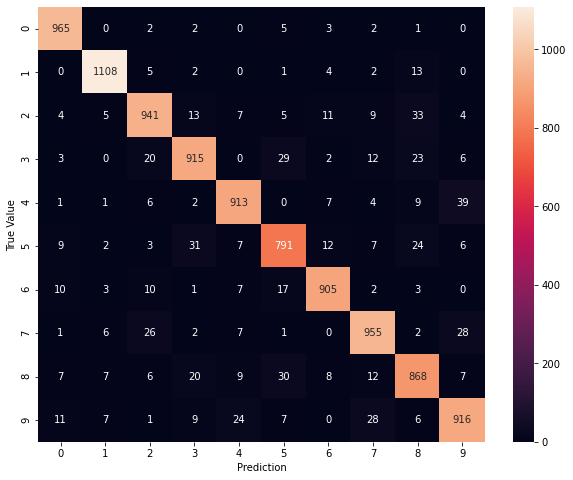

In [147]:
import seaborn as sb
plt.figure(figsize=(10,8))
sb.heatmap(conf_mat_1, annot=True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('True Value')

### Inference : A few dark blue blocks have positive values which tell us the wrong predictions/ errors in our model

# ---------------------------------------------------------------------------------------------------------------

## Building our Second Model using Hidden Layer

##### Here we add a hidden layer after the input layer which will help us optimize the model better but processing it using two layers.
##### Using two seperate activation functions iin each layer ensures the efficiency of our model.

In [148]:
second_model = keras.Sequential([
    
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
    
])

second_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

second_model.fit(X_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1418 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0763 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0352 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9914
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.025

In [149]:
second_model.evaluate(X_test_flat,y_test)[1]*100

313/313 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9766


97.65999913215637

##### Accuracy : 97.66 %

### As we can see the accuracy of our model is highly improved with the addition of one hidden layer.
#### One can use more hidden layers if they wish.



# --------------------------------------------------------------------------------------------------------------




## Experimenting with the number of Neurons in the first layer


##### Let's see how our model behaves if we change the no. of neurons from 100 to 400 in our first layer

In [169]:
second_model = keras.Sequential([
    
    keras.layers.Dense(300, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
    
])

second_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

second_model.fit(X_train_flat, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2339 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0961 - accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [170]:
second_model.evaluate(X_test_flat,y_test)[1]*100

313/313 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9801


98.00999760627747

##### Accuracy : 98 %
#### The accuracy of our model increased 

## Confusion Matrix 2

In [152]:
y_pred_2 = second_model.predict(X_test_flat)

y_pred_labels2 = [np.argmax(i) for i in y_pred_2]

In [153]:
conf_mat_2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels2)

Text(69.0, 0.5, 'True Value')

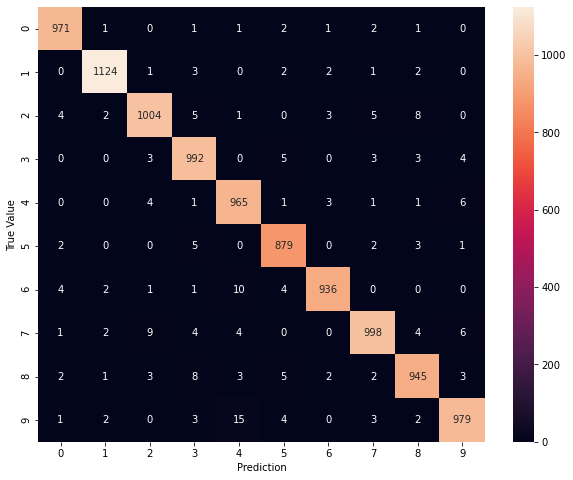

In [154]:
plt.figure(figsize=(10,8))
sb.heatmap(conf_mat_2, annot=True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('True Value')

### Inference : The values in dark blue blocks have decreased substantially since our first model, which tells us that second model is much better.

# --------------------------------------------------------------------------------------------------------

## Building our Third Model using a Flattening layer

##### Here instead of manually flattening the train and test sets, we will use a Flattening Layer to flatten the matrix.

In [155]:
third_model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(400,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')  
    
])

third_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

third_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2263 - accuracy: 0.9349
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0917 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [159]:
third_model.evaluate(X_test,y_test)[1]*100

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9801


98.00999760627747

##### Accuracy : 98 %

#### Accuracy is same as our previous model 

## Confusion Matrix 3

In [160]:
y_pred_3 = third_model.predict(X_test)

y_pred_labels3 = [np.argmax(i) for i in y_pred_3]

In [161]:
conf_mat_3 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels3)

Text(69.0, 0.5, 'True Value')

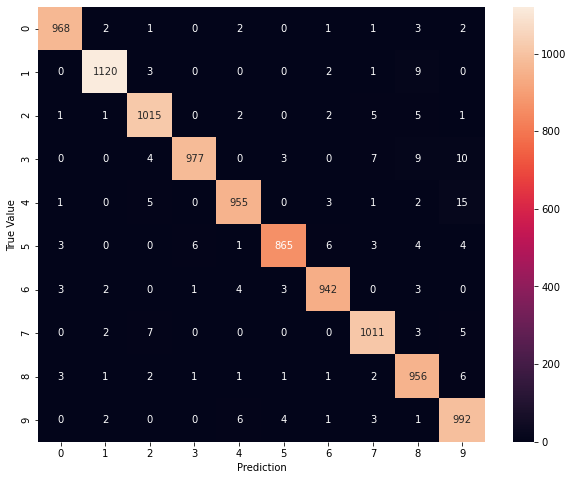

In [162]:
plt.figure(figsize=(10,8))
sb.heatmap(conf_mat_3, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True Value')

### Inference : The values in dark blue boxes are pretty low which shows that our model is pretty accurate

# ------------------------------------------------------------------------------------------------------------

# Conclusion: 
# Hence, we succesfully build an Image Classification Model using Neural Networks to classify the MNIST Dataset with overall accuracy of 98%


#####                                                                                                                                                                -- Swapnil Srivastava (Batch : 5270)